[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python/blob/main/9-gyakorlat.ipynb)

# Házi feladatok

Implementáljuk a `RandomNames` osztályt.

A egyedeknek legyen egy `names` property-je, ami olvasáskor a névsort az eredeti sorrendben adja vissza, és íráskor beállítja az új névsort. A `RandomNames` legyen iterálható és az `__iter__` metódusa egy végtelen generátort adjon vissza, ami véletlen sorrendben megy végig a neveken, ha végig ért akkor újra kezdi újrasorsolt véletlen sorrendben. Az egyedek legyenek függvényszerűek is (`__call__` metódus). A függvény hívás eredménye legyen egyetlen találomra választott név a névsorból.

Emlékeztető: Egy osztályban a `@property` dekorátorral tudunk `property` mezőt létrehozni. A dekorált függvény szolgál a mező kiolvasára. Ha írhatóvá szeretnénk tenni a mezőt, akkor a `mezőnév.setter` dekorátort kell használni.

Pl.
```
class RandomNames:

    @property
    def names(self):
        pass
   
    @names.setter
    def names(self, new_value):
        pass
```
A names mező írásakor végezzen ellenőrzést a függvény. Azaz ha nem sztringekből álló sorozattal hívjuk meg, akkor dobjon `ValueError`-t. A kapott nevek első betűjét írja át nagy betűvé, a többit viszont írja át kis betűre. Figyeljünk arra, hogy `rn.names = 'Attila'` hibát kell, hogy dobjon, de a sorozat nem csak lista lehet, hanem bármi amin végig lehet iterálni!

Pl.

```
rn = RandomNames(['anDoR'])
rn.names # -> ['Andor']
rn.names = ['ALADÁR', 'elemér']
rn.names # -> ['Aladár', 'Elemér']
```

A véletlenszerű sorrend előállításához használhatjuk a `random` modul, `shuffle` függvényét. Figyeljünk arra, hogy ez elronthatja az eredeti sorrendet!

Inicializáláskor az egyed kap egy névsort. Ezt kezelje úgy, mintha names tulajdonságot írtuk volna!

Írjunk teszt függvényt! Ez ellenőrizze az inicializálást, ill. names tulajdonság írását, olvasását. Úgy is, hogy a kettő között az iterátort is használtuk.

Gondolkozzunk el azon, hogyan lehetne a véletlenszám generálást tartalmazó részeket tesztelni: iterátor, függvény hívás. Ha más nem jut eszünkbe, akkor az alábbi lehetőségek közül legalább egyet implementáljunk a teszt függvényben.

Ha $n$ nevet adtunk meg, akkor $n$-szer iterálva az iterátort mindegyik nevet pontosan egyszer kell, hogy megkapjuk.

Ha $n$ elég nagy, $n$>10, akkor két egymástól független véletlen sorrend nagyon kis valószínűséggel esik egybe.

Ha sokszor hívjuk meg az egyedet, akkor mindegyik név nagyjából $1/n$
relatív gyakorísággal kell, hogy szerepeljen. pl. ha $m$ a hívások száma, akkor $4/\sqrt{nm}$ eltérést megengedve, csak nagyon kis valószínűséggel téved a teszt.

Most és érdemes az osztály vázával és a tesztfüggvénnyel kezdeni.

In [12]:
import random 

    
class RandomNames:
    def __init__(self, names):
        self.names = names

    def __str__(self):
        return f"{self.names}"
    
    def __repr__(self):
        return f"{type(self).__name__}({self.names})"
    
    @property
    def names(self):
        return self._names
    
    @names.setter
    def names(self, values):
        ## checking
        self._names = values
        return self.names

    def __iter__(self):
        pass        

    def __call__(self):
        pass
        

        

In [13]:
import ipytest
ipytest.autoconfig()

In [18]:
%%ipytest 
from pytest import raises
from collections import Counter 
from itertools import islice
from scipy.stats import chi2 
import math

def is_uniform(counts):
    n = sum(counts)
    np = n/len(counts)
    stat = sum(((v-np)**2)/np for v in counts)
    return chi2.sf(stat, df=len(counts)-1)>0.001

def test_random_names():
    names = list("abcde".upper())
    rn = RandomNames(list("abcde"))
    assert rn.names == names

    with raises(ValueError):
        rn.names = "attila"
    
    with raises(ValueError):
        rn.names = [1, "a", "aa", "bb"]

    rn.names = map(str, range(101))
    assert rn.names == [str(i).capitalize() for i in range(101)]

    rn.names = tuple("abcde")
    assert rn.names == [x.capitalize() for x in "abcde"]

    
    rn.names = [x*3 for x in "abcdefghujk"]

    name_list = rn.names.copy()

    for name in rn.names:
        assert name == name.capitalize()

def test_call():
    rn = RandomNames(x*3 for x in "abcdefghujk")

    name_list = rn.names.copy()

    for name in rn.names:
        assert name == name.capitalize()

    ### __call__ 
    for _ in range(100):
        assert rn() in rn.names 

    ## names should not change 
    assert rn.names == name_list

    ## randomness in __call__
    n = 10_000
    cnt = Counter(rn() for _ in range(n))
    assert is_uniform(list(cnt.values())) 

def test_iter():
    rn = RandomNames(x*5 for x in "abcdefghujk")

    name_list = rn.names.copy()

    ### __iter__
    assert set(islice(rn, len(rn.names))) == set(rn.names)

    it = iter(rn)
    lst1, lst2 = islice(it, len(rn.names)), islice(it, len(rn.names))

    ## names should not change
    assert rn.names == name_list
    ## each block of len(rn.names) should be a random permutation 
    assert set(lst1) == set(rn.names)
    assert set(lst2) == set(rn.names)
    assert lst1 != lst2
    
    it = iter(rn)
    lst = [list(islice(it, len(rn.names))) for _ in range(10_000)]
    cnts = [list(Counter(x).values()) for x in zip(*lst)] 
    print([(min(x), max(x)) for x in cnts])
    assert all([is_uniform(cnt) for cnt in cnts])
    


...                                                                                          [100%]
3 passed in 0.17s


Írjuk meg a `RandomNames` osztály implementációját!

In [15]:
import random 

def capitalize(x):
    if not isinstance(x, str):
        raise ValueError
    return x.capitalize()
    
class RandomNames:
    def __init__(self, names):
        self.names = names

    def __str__(self):
        return f"{self.names}"
    
    def __repr__(self):
        return f"{type(self).__name__}({self.names})"
    
    @property
    def names(self):
        return self._names
    
    @names.setter
    def names(self, values):
        ## checking
        if isinstance(values, str):
            raise ValueError
        self._names = [capitalize(x) for x in values]
        return self.names

    def __iter__(self):
        names = self.names.copy()
        while True:
            random.shuffle(names)
            for name in names:
                yield name
        

    def __call__(self):
        return random.choice(self._names)


In [17]:
rn = RandomNames(x*3 for x in "abcde")
list(rn() for _ in range(10))
rn, str(rn)

(RandomNames(['Aaa', 'Bbb', 'Ccc', 'Ddd', 'Eee']),
 "['Aaa', 'Bbb', 'Ccc', 'Ddd', 'Eee']")

## További példák dekorátorokra

A `functools` modulban számos hasznos dekorátor található

- `lru_cache`: A függvényből a memorizált változatot készíti el.
- `partial`: `g = partial(f, 1)` hatására `g(...)` ugyanaz, mint `f(1, ...)`
- `wraps`: lásd a dokumentációt.

In [19]:
from functools import lru_cache, partial, wraps

@lru_cache()
def f(x):
    return x*x

print(f(1), f(2), f(1))
print(f.cache_info())

def add(a, b):
    return a+b

inc = partial(add, 1)
inc(10)




1 4 1
CacheInfo(hits=1, misses=2, maxsize=128, currsize=2)


11

In [20]:
def decor_wo_wraps(f):
    def h(*args):
        print("decorated without wraps")
        return f(*args)
    return h

def decor_wraps(f):
    @wraps(f)
    def h(*args):
        print("decorated with wraps")
        return f(*args)
    return h


In [21]:
@decor_wo_wraps
def dummy_fn(a:int, b:int) -> int:
    """dummy fn. Nothing interesting"""
    return a+b

print(dummy_fn(1, 2))
help(dummy_fn)

decorated without wraps
3
Help on function h in module __main__:

h(*args)



In [22]:
@decor_wraps
def dummy_fn(a:int, b:int) ->int:
    """dummy fn. Nothing interesting"""
    return a+b

print(dummy_fn(1, 2))
help(dummy_fn)

decorated with wraps
3
Help on function dummy_fn in module __main__:

dummy_fn(a: int, b: int) -> int
    dummy fn. Nothing interesting



# Öröklődés

Előadáson szerepelt ehhez hasonló példa. Legyenek `Polygon`, `Rectangle`, `Square` osztályaink.
Minden négyzet téglalap és minden téglalap sokszög. Egy sokszöget a csúcsok felsorolásával adhatunk meg.
Ebből a kerület, terület kiszámolható és eldönthető, hogy a sokszög konvex-e. Ha akarjuk pl. a `Matplotlib` könyvtárral ki is rajzolhatjuk a sokszöget.

Menetközben síkvektorokkal akarunk számolni. Erre kényelmes a `numpy` könyvtárat használni.

In [23]:
import math
import numpy as np
from itertools import cycle

class Polygon:

    def __init__(self, nodes):
        self.nodes = nodes

    def area(self):
        if self.is_convex():
            nodes = np.array(self.nodes)
            nodes = nodes-nodes[0]
            area = 0
            for v1, v2 in zip(nodes[1:], nodes[2:]):
                area += abs(v1[0]*v2[1]-v1[1]*v2[0])
            return area
        else:
            raise NotImplementedError
            ## hf!

    def perimeter(self):
        total = 0
        for i, p in enumerate(self.nodes, 1):
            j = i % len(self.nodes)
            total += np.linalg.norm(self.nodes[j]-p)
        return total

    def is_convex(self):
        nodes = np.array(self.nodes + self.nodes[:1])
        edges = np.diff(nodes, axis=0)
        idx = np.array([i%len(edges) for i in range(1, len(edges)+1)])
        edges1 = edges[idx]
        sgn = (rotate90(edges) * edges1).sum(axis=1)
        return (min(sgn)*max(sgn)>=0)

    def draw(self):
        pass
    
    def __repr__(self):
        return f'{type(self).__name__}({[tuple(x) for x in self.nodes]})'


def rotate90(x):
    return np.flip(x, -1)*np.array([-1, 1])

class Rectangle(Polygon):
    
    def __init__(self, P1, P2, r):
        """
        Assuming that e is P1P2 rotated counterclockwise by 90 degree
        P1, P2, P2+r e, P1+re
        """
        v = rotate90(P2-P1)*r
        super(Rectangle, self).__init__([P1, P2, P2+v, P1+v])
        
    
class Square(Rectangle):

    def __init__(self, P1, P2):
        super(Square, self).__init__(P1, P2, 1)
        


In [24]:
rotate90(np.array([[0, 1],[1,0]]))

array([[-1,  0],
       [ 0,  1]])

In [25]:
points = np.array([[0,0], [1,1]])
s = Square(points[0], points[1])
t = Rectangle(points[0], points[1], 2)
p = Polygon(points)
for x in [s, t, p]:
    print(f"{x} kerület: {x.perimeter():.2f}, konvex: {x.is_convex()}, terület: {x.area():.2f}")
    

Square([(0, 0), (1, 1), (0, 2), (-1, 1)]) kerület: 5.66, konvex: True, terület: 4.00
Rectangle([(0, 0), (1, 1), (-1, 3), (-2, 2)]) kerület: 8.49, konvex: True, terület: 8.00
Polygon([(0, 0), (1, 1)]) kerület: 2.83, konvex: True, terület: 0.00


In [26]:
points = np.array([[0,0], [2,0], [2,2], [1,1], [0,2]]) 
p = Polygon(list(points))
print(p.is_convex())
p.draw()


False


Vegyük észre, hogy az `__repr__` metódust csak egyszer implementáltuk, mégis minden egyednek a saját típusát írja ki!
Az előző kód blokkot futtassuk le azután is, hogy a `draw` metódust implementáltuk.

# `Matplotlib.pyplot` könytár

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline

A legtöbbet használt függvények a  `plot` és az `imshow`.

In [28]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


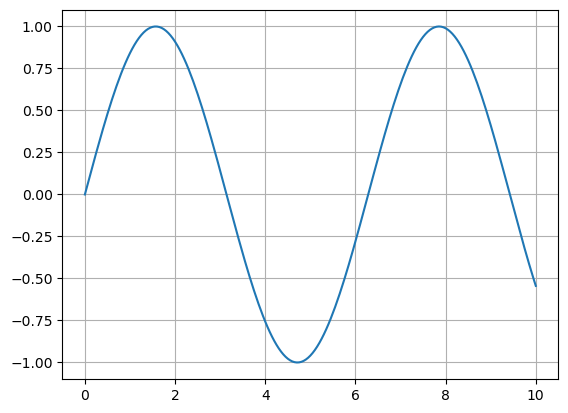

In [29]:
x = np.linspace(0,10, 201)
print(x[:10])
plt.plot(x, np.sin(x))
plt.grid()
plt.show()

In [30]:
url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png" 
img = plt.imread(url)
img.shape

/tmp/ipykernel_597999/3569767223.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = plt.imread(url)


(220, 220, 3)

In [31]:
import PIL
import urllib
img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
img.shape

(220, 220, 3)

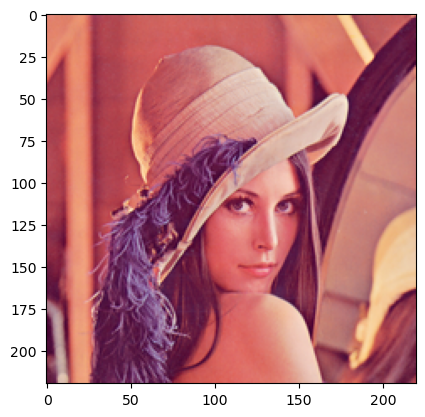

In [32]:
plt.imshow(img)
plt.show()

(-1.1, 1.1, -0.1, 2.1)

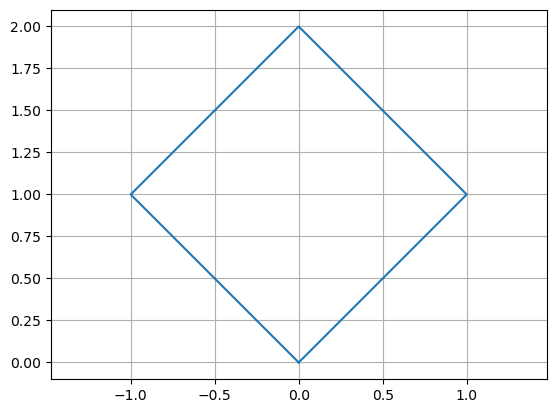

In [33]:
plt.plot(*np.array(s.nodes)[[0,1,2,3,0]].T)
plt.grid()
plt.axis('equal')
# plt.axis('off')


In [34]:
def draw(self,  *args, fill=False, **kwargs):
    nodes = self.nodes + self.nodes[:1]
    x, y = np.array(nodes).T
    if fill:
        plt.fill(x, y, alpha=0.5)
    plt.plot(x, y, *args, **kwargs) 
    plt.axis('equal')

Polygon.draw = draw

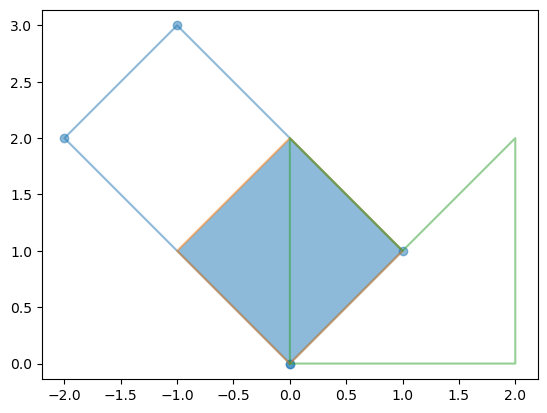

In [35]:
t.draw('o-', alpha=0.5)
s.draw(alpha=0.5, fill=True)
p.draw(alpha=0.5)
plt.show()